# Data pre-processing


## Normalization

Normalize the samples' values to scale them to a smaller, consistent range.

It ensures that all features have the same scale, which can help in improving the performance for certain ML algorithms.

### Min-Max scaling (x - min) / (max - min)

https://www.educative.io/answers/what-is-data-scaling-and-normalization-in-machine-learning

- scales the values of a numeric feature into a 0 to 1 range (typically)
- preserves the original data distribution


In [8]:
import pandas as pd

# Define file paths
balanced_dataset_path = "./data/4-data-balancing/reduced_dataset.csv"
normalized_dataset_path = "./data/5-data-scaling/min_max_normalization.csv"

# Load the dataset in a df
df = pd.read_csv(balanced_dataset_path)

# Define the feature columns selected for Min-max Scaling
features_df = ["empatica_bvp", "empatica_eda", "empatica_temp", "samsung_bvp"]


# Min-Max Scaling implementation
def min_max_scaling(x):
    min = x.min()
    max = x.max()
    return ((x - min) / (max - min)).apply(lambda norm: f"{norm:.10f}")


# Apply min-max scaling to the feature
for feature in features_df:
    df[feature] = min_max_scaling(df[feature])

# Write the Min-Max scaled df into a new .csv file
df.to_csv(normalized_dataset_path, index=False)

### Z-score normalization (Standardization)

https://www.educative.io/answers/what-is-data-scaling-and-normalization-in-machine-learning

- calculates the mean (μ) and standard deviation (σ) of each feature column and scale the values using the Z-score formula
- aiming to have a mean 0 and a standard deviation 1
- useful when the features have different units or different ranges
- used in centering the data around zero and scaling it to have unit variance
- a z-score close or equal to 0 - the data point is very close or exactly the mean
- positive or negative z-scores represents the number of std-s the data point deviates from the mean (higher +; smaller -)

Z = (x − μ) / σ

Where:

- Z : the z-score
- x : the data point
- μ : the mean
- σ : the standard deviation


In [9]:
import pandas as pd

# Define file paths
balanced_dataset_path = "./data/4-data-balancing/reduced_dataset.csv"
z_score_normalized_dataset_path = "./data/5-data-scaling/z_score_standardization.csv"

# Load the dataset into a df
df = pd.read_csv(balanced_dataset_path)

# Define the feature columns selected for Z-score Scaling
features_df = ["empatica_bvp", "empatica_eda", "empatica_temp", "samsung_bvp"]


# Z-score Scaling implementation
def z_score_scaling(x):
    mean = x.mean()
    std = x.std()
    return ((x - mean) / std).apply(lambda stand: f"{stand:.10f}")


# Apply Z-score scaling to the features
for feature in features_df:
    df[feature] = z_score_scaling(df[feature])

# Write the Z-score scaled df to a new .csv file
df.to_csv(z_score_normalized_dataset_path, index=False)

## Splitting the data into training, testing, validation datasets

- **training** (71.4286%)

  - the data used for training
  - split ID wise
  - containing the samples from IDs 0, 2, 4, 6, 8

- **testing** (14.2857%)
  - the data used for testing
  - split ID wise
  - containing the samples from ID 9
- **validation** (14.2857%)
  - the data used for validation
  - split ID wise
  - containing the samples from ID 10


In [10]:
import pandas as pd

# Define file paths
min_max_dataset_path = "./data/5-data-scaling/min_max_normalization.csv"
z_score_dataset_path = "./data/5-data-scaling/z_score_standardization.csv"

min_max_training_dataset_path = "./data/6-data-split/min-max/a_training.csv"
min_max_testing_dataset_path = "./data/6-data-split/min-max/b_testing.csv"

z_score_training_dataset_path = "./data/6-data-split/z-score/a_training.csv"
z_score_testing_dataset_path = "./data/6-data-split/z-score/b_testing.csv"

# Define a dictionary for the two scaled versions datasets and their attributes
scaled_datasets = {
    "min_max": {
        "path": min_max_dataset_path,
        "training_path": min_max_training_dataset_path,
        "testing_path": min_max_testing_dataset_path,
    },
    "z_score": {
        "path": z_score_dataset_path,
        "training_path": z_score_training_dataset_path,
        "testing_path": z_score_testing_dataset_path,
    },
}

# Define the IDs for each subset
training_ids = [0, 2, 4, 6, 8, 9]
testing_id = 10

# Iterate over each of the scaled datasets using `data` for the dictionary data
for _, data in scaled_datasets.items():
    # Load the input dataset having the path value at key `path`
    df = pd.read_csv(data["path"])

    # Create corresponding split subsets, ID-wise
    # Guidance for resetting the index, provided by ChatGPT
    # Specific implementation details were adapted for the purposes of this project.
    training_df = df[df["ID"].isin(training_ids)]
    testing_df = df[df["ID"] == testing_id]

    # Define the list of the dictionaries' path keys
    path_keys = ["training_path", "testing_path", "validation_path"]

    # Iterate over the subsets to reset the indexes corresponding to the new df structures / content
    for i, dataset in enumerate([training_df, testing_df]):
        # Guidance for resetting the index for each of the datasets, provided by ChatGPT
        # Specific implementation details were adapted for the purposes of this project.
        dataset.reset_index(drop=True, inplace=True)
        dataset.to_csv(data[path_keys[i]], index=False)

## Data Distribution Visualization for Min-Max Normalization and Z-Score Standardization datasets


Smoothed Min-Max Normalized Dataset:
   Unnamed: 0  ID  empatica_bvp  empatica_eda  empatica_temp  samsung_bvp  CL
0           0   9      0.448570      0.735557            1.0     0.365516   1
1           1   9      0.433541      0.740847            1.0     0.365448   1
2           2   9      0.466703      0.738203            1.0     0.356536   1
3           3   9      0.577962      0.739965            1.0     0.356704   1
4           4   9      0.446553      0.739084            1.0     0.358417   1

Smoothed Z-Score Standardized Dataset:
   Unnamed: 0  ID  empatica_bvp  empatica_eda  empatica_temp  samsung_bvp  CL
0           0   9     -0.059322      2.105021       2.276764     0.212500   1
1           1   9     -0.318986      2.126851       2.276764     0.212109   1
2           2   9      0.253982      2.115938       2.276764     0.161453   1
3           3   9      2.176344      2.123212       2.276764     0.162409   1
4           4   9     -0.094172      2.119573       2.276764     

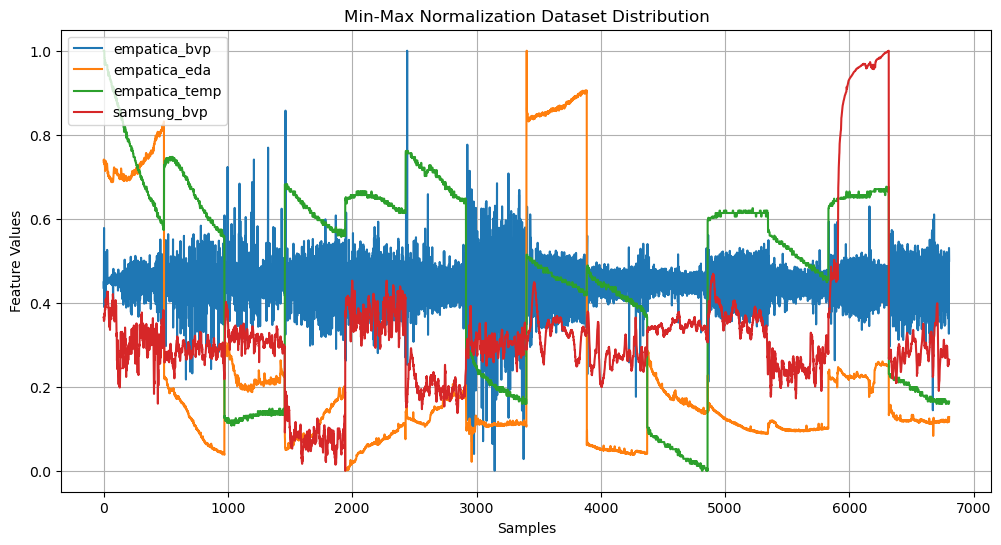

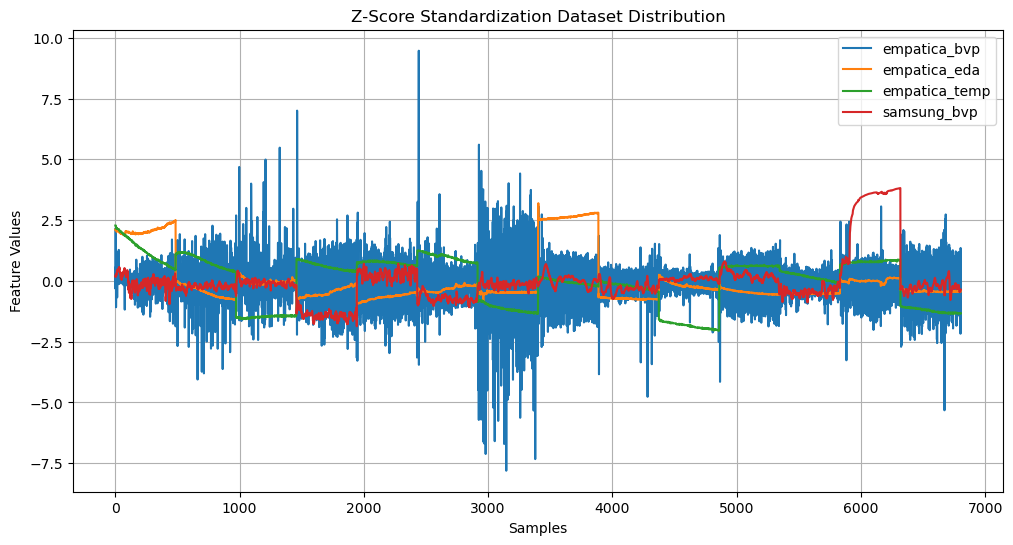

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
min_max_dataset_path = "./data/5-data-scaling/min_max_normalization.csv"
z_score_dataset_path = "./data/5-data-scaling/z_score_standardization.csv"

# Load the datasets
min_max_df = pd.read_csv(min_max_dataset_path)
z_score_df = pd.read_csv(z_score_dataset_path)

# Plotting each feature in the Min-Max Normalized dataset
plt.figure(figsize=(12, 6))
for column in min_max_df.columns:
    if column != "Unnamed: 0" and column != "ID" and column != "CL":
        plt.plot(min_max_df.index, min_max_df[column], label=column)


print("Smoothed Min-Max Normalized Dataset:")
print(min_max_df.head())

print("\nSmoothed Z-Score Standardized Dataset:")
print(z_score_df.head())

plt.xlabel("Samples")
plt.ylabel("Feature Values")
plt.title("Min-Max Normalization Dataset Distribution")
plt.legend()
plt.grid(True)
plt.show()

# Plotting each feature in the Z-score Standardized dataset
plt.figure(figsize=(12, 6))
for column in z_score_df.columns:
    if column != "Unnamed: 0" and column != "ID" and column != "CL":
        plt.plot(z_score_df.index, z_score_df[column], label=column)

plt.xlabel("Samples")
plt.ylabel("Feature Values")
plt.title("Z-Score Standardization Dataset Distribution")
plt.legend()
plt.grid(True)
plt.show()